<a href="https://colab.research.google.com/github/anaisaoviedo-upb/Balanceo-en-clasificacion/blob/main/Tecnicas_balanceo_clases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Técnicas de Balanceo de Clases en Machine Learning

Este notebook explora distintas técnicas de balanceo para conjuntos de datos desbalanceados, especialmente útiles cuando la clase minoritaria es la que más nos interesa. **No se aplican transformaciones (normalizacion, dummies, discretización)**, las transformaciones se realizan posterior al balanceo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Preparación de datos

In [ ]:
data = pd.read_excel("ataque_corazon.xlsx",sheet_name=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    5110 non-null   int64  
 1   hypertension           5110 non-null   object 
 2   heart_disease          5110 non-null   object 
 3   ever_married           5110 non-null   object 
 4   avg_glucose_level      5110 non-null   float64
 5   smoking_status         5110 non-null   object 
 6   stroke_ataque_corazon  5110 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 279.6+ KB


In [ ]:
data.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,smoking_status,stroke_ataque_corazon
0,1,No,No,No,122.04,Unknown,No
1,79,No,No,Yes,79.03,Unknown,No
2,40,No,No,Yes,60.96,'never smoked',No
3,4,No,No,No,107.25,Unknown,No
4,8,No,No,No,106.51,Unknown,No


In [ ]:
#Corrección tipos de datos
data['hypertension']=data['hypertension'].astype('category')
data['heart_disease']=data['heart_disease'].astype('category')
data['ever_married']=data['ever_married'].astype('category')
data['smoking_status']=data['smoking_status'].astype('category')
data['stroke_ataque_corazon']=data['stroke_ataque_corazon'].astype('category')

<Axes: xlabel='stroke_ataque_corazon'>

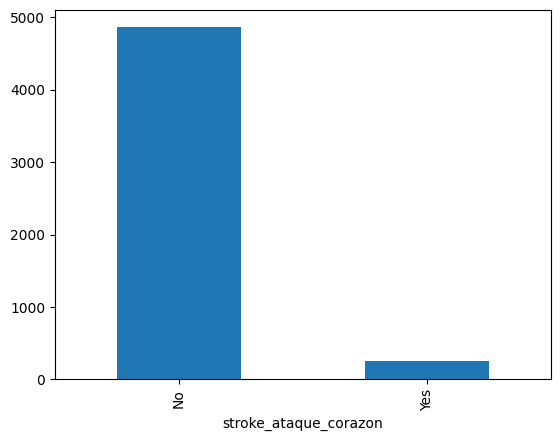

In [ ]:
data['stroke_ataque_corazon'].value_counts().plot(kind='bar')

In [ ]:
data['stroke_ataque_corazon'].value_counts()

,count
stroke_ataque_corazon,
No,4861
Yes,249


In [ ]:
X = data.drop("stroke_ataque_corazon", axis = 1)
Y = data['stroke_ataque_corazon']

# **Tener presente que los datos están sin transformaciones**

## ⚖️ Undersampling
**Descripción**: Reduce el número de instancias de la clase mayoritaria para balancear.
**Configuración**: `RandomUnderSampler()` elimina ejemplos al azar.
Puede provocar pérdida de información útil de la clase mayoritaria.

<Axes: xlabel='stroke_ataque_corazon'>

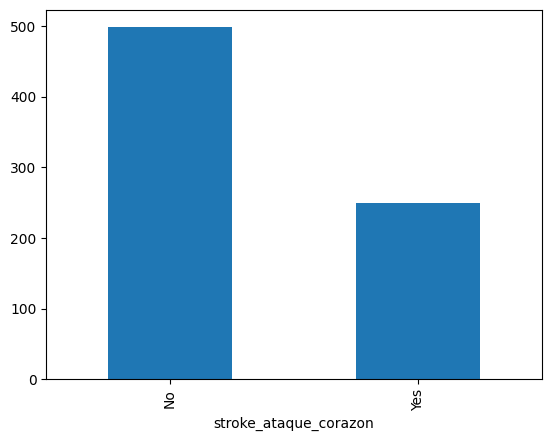

In [ ]:
#Elimina ejemplos de la clase mayoritaria para que su tamaño sea el doble del tamaño de la clase minoritaria.

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_rus, y_rus = rus.fit_resample(X, Y)

y_rus.value_counts().plot(kind='bar')

In [ ]:
y_rus.value_counts()

,count
stroke_ataque_corazon,
No,498
Yes,249


## 🔁 Oversampling
**Descripción**: Duplica instancias de la clase minoritaria para balancear.
**Configuración**: `RandomOverSampler()` replica aleatoriamente los datos minoritarios.
Puede inducir overfitting.

<Axes: xlabel='stroke_ataque_corazon'>

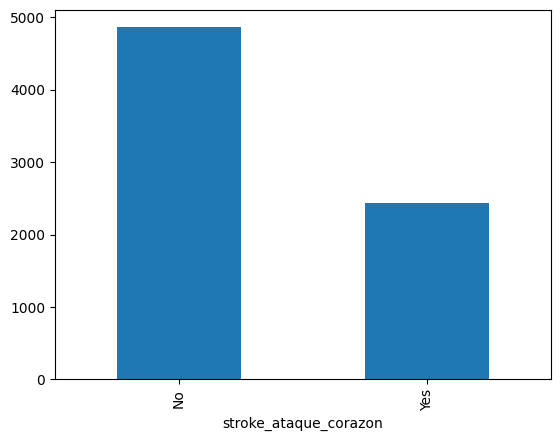

In [ ]:
#La clase minoritaria se incrementará hasta ser el 50% del tamaño de la mayoritaria.

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_ros, y_ros = ros.fit_resample(X,Y)

y_ros.value_counts().plot(kind='bar')

In [ ]:
y_ros.value_counts()

,count
stroke_ataque_corazon,
No,4861
Yes,2430


## 🧬 SMOTE (Synthetic Minority Over-sampling Technique)
**Descripción**: Genera nuevas instancias sintéticas interpolando entre vecinos cercanos de la clase minoritaria.

**Configuración**:

* Para variables predictoras numéricas
sm = SMOTE( k_neighbors=2)

* Cuando se tiene al menos una variable predictora categórica
sm = SMOTENC(categorical_features=[ ], k_neighbors=2)  

<Axes: xlabel='stroke_ataque_corazon'>

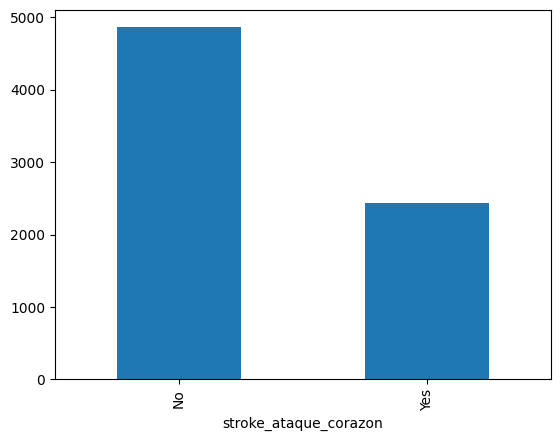

In [ ]:
#La clase minoritaria tendrá el 50% del tamaño de la clase mayoritaria, adicionando datos sintéticos
from imblearn.over_sampling import SMOTE, SMOTENC

smote = SMOTENC(k_neighbors=2, categorical_features=[1,2,3,5], sampling_strategy=0.5)
X_smote, y_smote = smote.fit_resample(X,Y)

y_smote.value_counts().plot(kind='bar')

In [ ]:
X_smote

,age,hypertension,heart_disease,ever_married,avg_glucose_level,smoking_status
0,1,No,No,No,122.040000,Unknown
1,79,No,No,Yes,79.030000,Unknown
2,40,No,No,Yes,60.960000,'never smoked'
3,4,No,No,No,107.250000,Unknown
4,8,No,No,No,106.510000,Unknown
...,...,...,...,...,...,...
7286,79,Yes,No,Yes,75.011602,'never smoked'
7287,70,No,No,Yes,197.365649,'formerly smoked'
7288,74,No,Yes,Yes,76.661209,smokes
7289,81,No,No,Yes,60.972022,'never smoked'
